In [14]:
import keras
import cv2
import matplotlib.pyplot as plt
import numpy as np
model = keras.models.load_model(r"C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\FaceRecognitionCNN.model")
CATEGORIES = ["Manav", "Nitin","Sarika"]
MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']
age_net = cv2.dnn.readNetFromCaffe('deploy_age.prototxt', 'age_net.caffemodel')
gender_net = cv2.dnn.readNetFromCaffe('deploy_gender.prototxt', 'gender_net.caffemodel')
font = cv2.FONT_HERSHEY_SIMPLEX

In [31]:
profileface = "haarcascade_profileface.xml"
frontalface = "haarcascade_frontalface_default.xml"
profilefacecascade = cv2.CascadeClassifier(profileface)
frontalfacecascade = cv2.CascadeClassifier(frontalface)
#video_capture = cv2.VideoCapture(0)

while True:
        ret, frame = video_capture.read()
        
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        
        faces = frontalfacecascade.detectMultiScale(
        gray,
        scaleFactor=1.2,
        minNeighbors=5,
        minSize=(20, 20),
        flags=cv2.CASCADE_SCALE_IMAGE
        )
        if len(faces) == 0:
            faces = profilefacecascade.detectMultiScale(
                gray,
                scaleFactor=1.2,
                minNeighbors=5,
                minSize=(20, 20),
                flags=cv2.CASCADE_SCALE_IMAGE
            )
        if len(faces) == 0:
            faces = profilefacecascade.detectMultiScale(
            cv2.flip(gray ,1),
            scaleFactor=1.2,
            minNeighbors=5,
            minSize=(20, 20),
            flags=cv2.CASCADE_SCALE_IMAGE
            )
            frame = cv2.flip(frame,1)
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                #cv2.imwrite("Dataset/User."+str(face_id)+'.'+str(count)+".jpg",cv2.flip(roi_gray,1))
            frame = cv2.flip(frame,1)
        else:
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 3)
                roi_gray = gray[y:y+h, x:x+w]
                roi_color = frame[y:y+h, x:x+w]
                #cv2.imwrite(r"C:\Users\hp\Desktop\Career Excellence Maam\Face Recognition\Testing\Mk.jpg",roi_gray)
        target = cv2.resize(roi_gray, (128, 128))
        target = target.reshape(1, 128, 128,1)
        target = np.array(target,dtype='float32')/255
        p=model.predict(target)
        sol=(CATEGORIES[np.argmax(p)])
        
        
        blob = cv2.dnn.blobFromImage(roi_color, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        gender_net.setInput(blob)
        gender_preds = gender_net.forward()
        gender = gender_list[gender_preds[0].argmax()]
        age_net.setInput(blob)
        age_preds = age_net.forward()
        age = age_list[age_preds[0].argmax()]
        overlay_text = "%s %s %s" % (sol,gender, age)
        cv2.putText(frame, overlay_text, (300,300), font, 1, (255, 255, 255), 2, cv2.LINE_AA)
        cv2.imshow('Video', frame)
        
        if cv2.waitKey(100) & 0xFF == ord('q'):
            break
video_capture.release()
cv2.destroyAllWindows()

In [24]:
video_capture = cv2.VideoCapture(0) 
ret, frame = video_capture.read()

In [26]:
ret, frame = video_capture.read()

video_capture = cv2.VideoCapture(0)
ret, frame = video_capture.read()

In [12]:
video_capture.release()
cv2.destroyAllWindows()

In [27]:
frame

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

TypeError: Invalid shape (1, 128, 128, 1) for image data

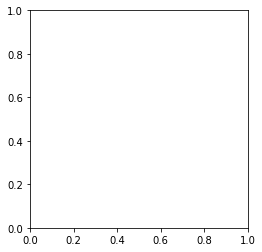

In [24]:
import matplotlib.pyplot as plt
plt.imshow(target)
plt.show()

In [17]:
video_capture.release()
cv2.destroyAllWindows()

In [22]:
roi_gray

array([[170, 171, 170, ..., 183, 182, 183],
       [170, 171, 170, ..., 182, 182, 186],
       [170, 170, 170, ..., 185, 184, 185],
       ...,
       [138, 137, 137, ..., 180, 181, 180],
       [139, 138, 138, ..., 180, 180, 180],
       [139, 139, 138, ..., 181, 179, 180]], dtype=uint8)